In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


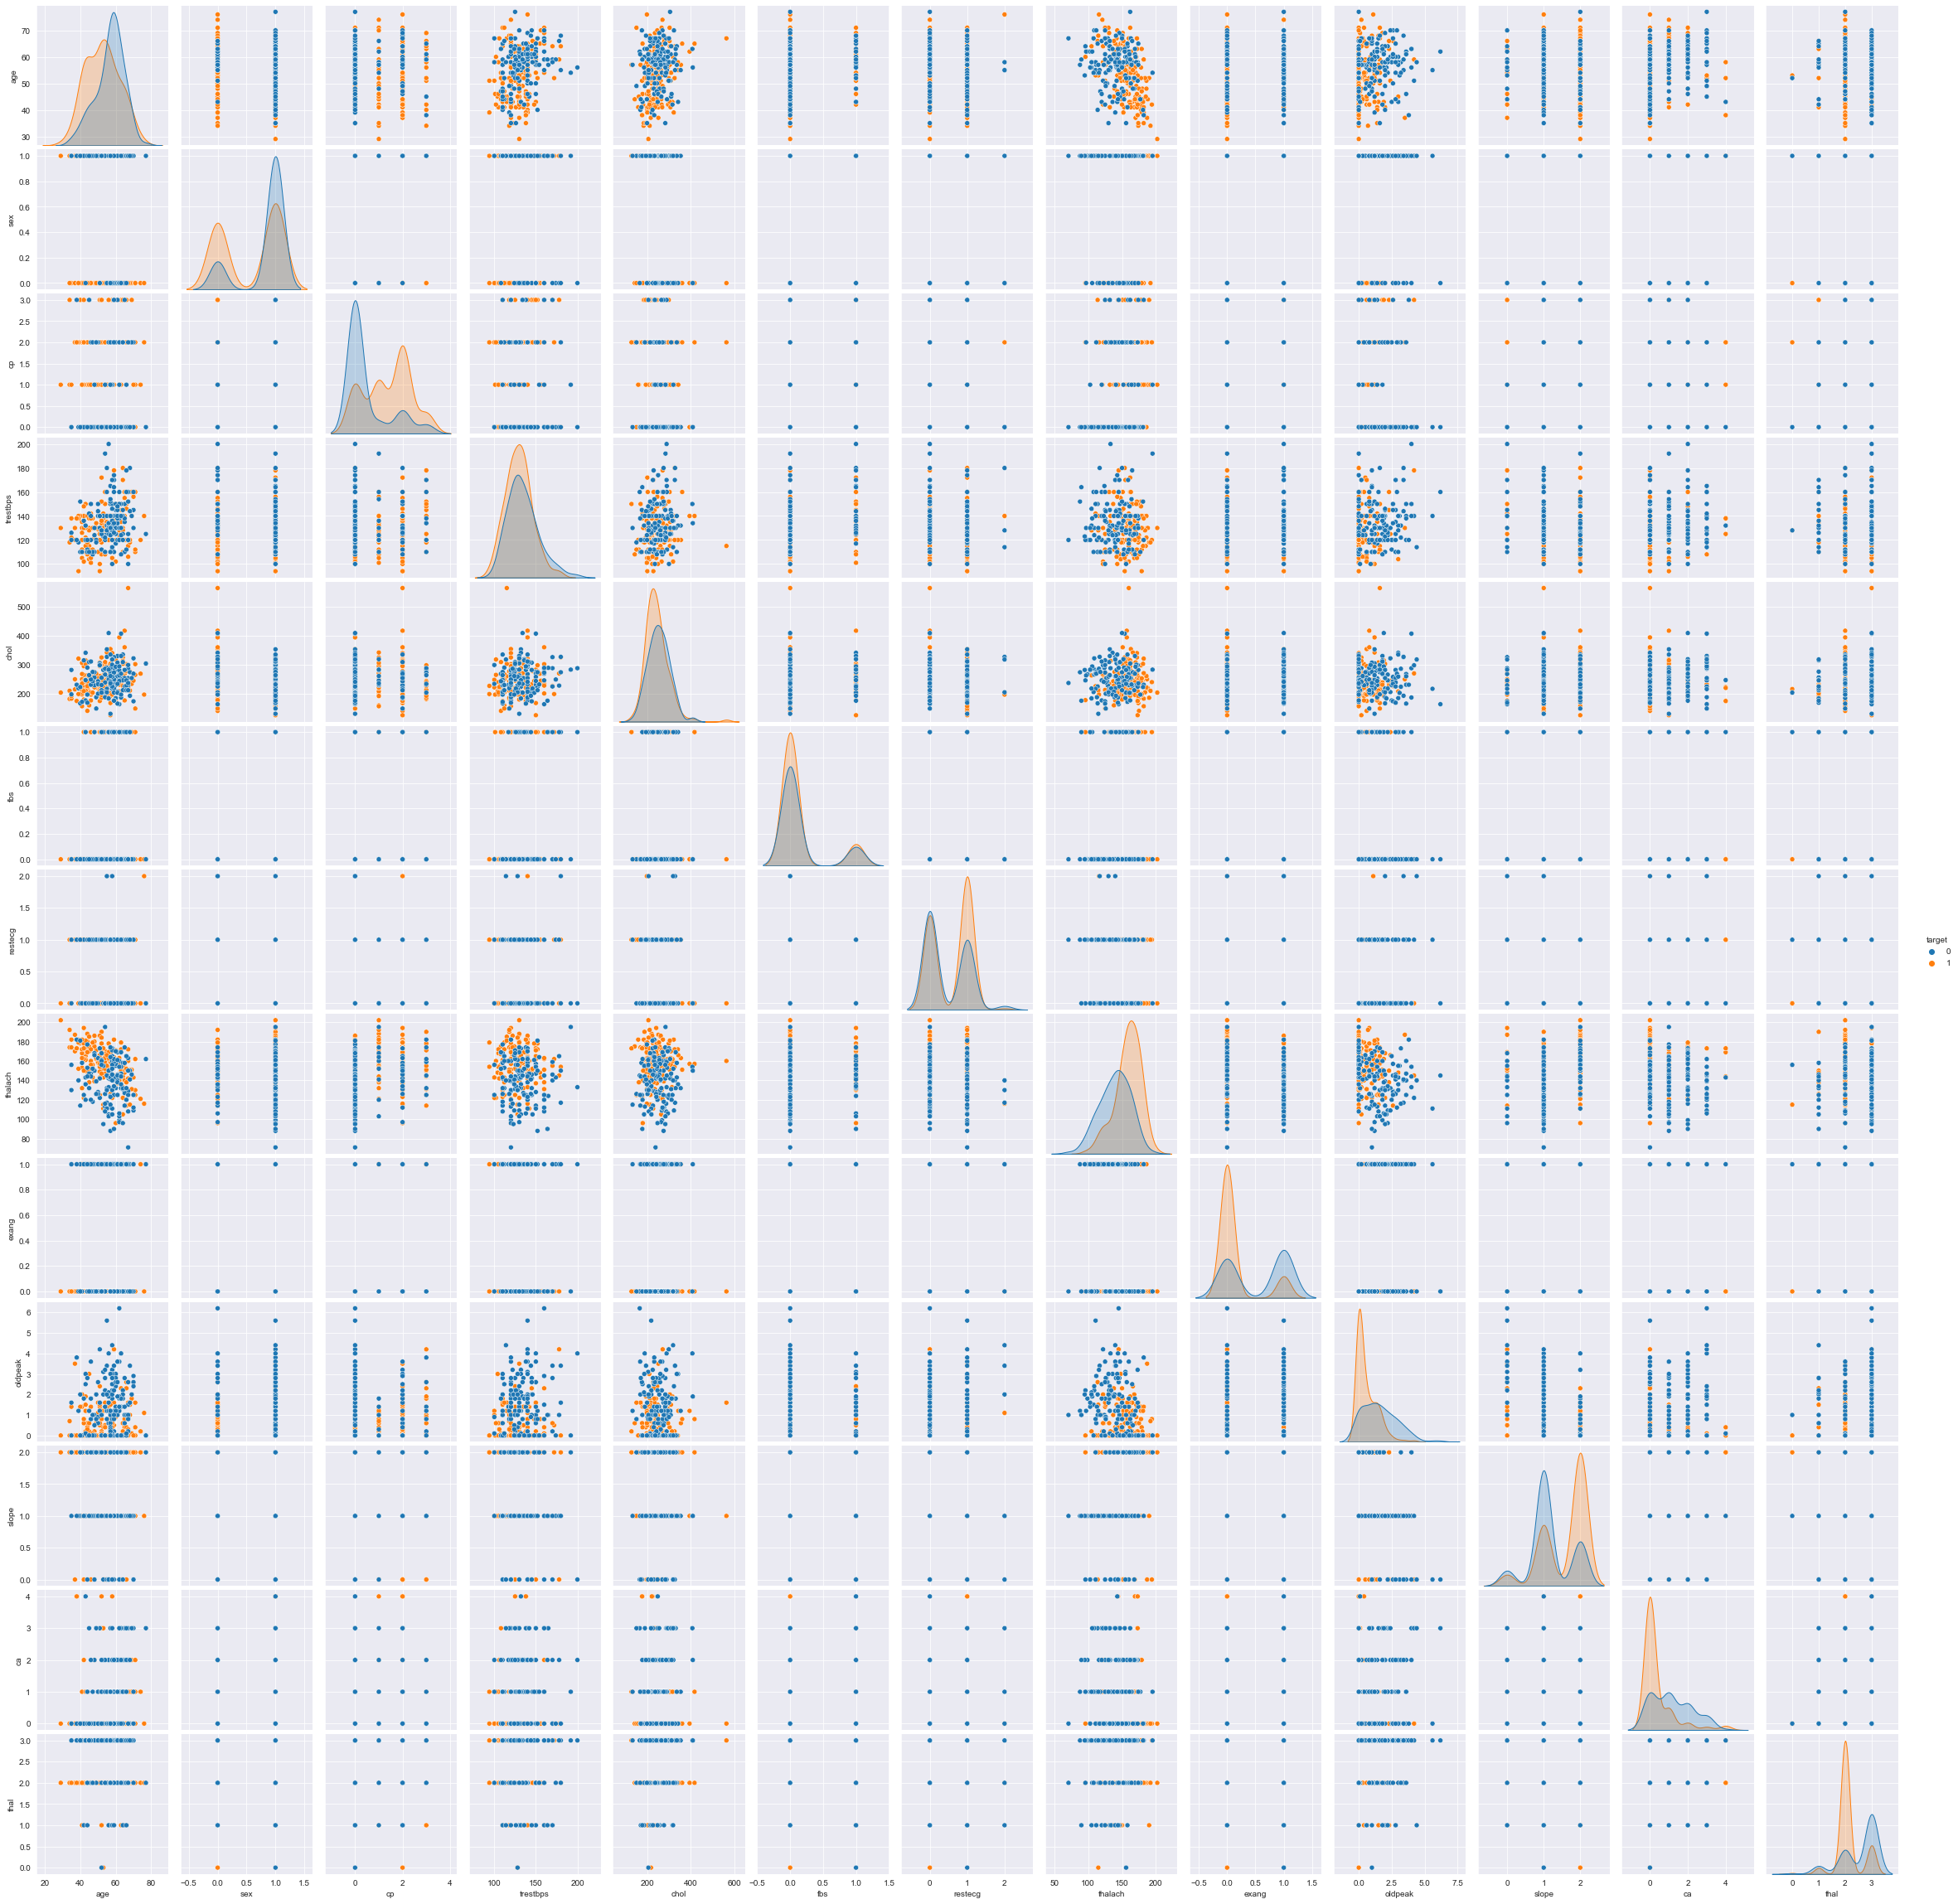

In [5]:
sns.pairplot(heart, hue='target')

In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
cols = heart.columns.tolist()

In [8]:
X = heart[cols[:-1]]

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y = heart['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

C:\Users\asmil\PycharmProjects\RE\Main_Paskaitos\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
model.score(X_train, y_train)

0.8784530386740331

In [14]:
preds = model.predict(X_test)

In [15]:
spejimai = pd.Series(data=preds, name='Spėjimas')

In [17]:
res = pd.concat([y_test.reset_index(), spejimai], axis=1)[['target', 'Spėjimas']]

In [18]:
res

,target,Spėjimas
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
117,1,1
118,1,1
119,0,0
120,0,0


In [19]:
res[res['target'] != res['Spėjimas']]

,target,Spėjimas
1,0,1
9,1,0
11,1,0
25,0,1
26,0,1
30,1,0
33,1,0
40,1,0
46,0,1
63,0,1


In [20]:
res.shape

(122, 2)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm

array([[42, 10],
       [11, 59]], dtype=int64)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7622950819672131

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8278688524590164

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)
knc.score(X_test, y_test)

0.680327868852459

In [26]:
XX = heart[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
yy = heart['target']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(XX)
scaled_features = scaler.transform(XX)
scaled_features[:4]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188]])

In [29]:
features = pd.DataFrame(scaled_features, columns=XX.columns)

In [30]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [31]:
XX_train, XX_test, yy_train, yy_test = \
train_test_split(features, yy, test_size=0.33, random_state=42)
fish_knc = KNeighborsClassifier(n_neighbors = 12).fit(XX_train, yy_train)
fish_knc.score(XX_test, yy_test)

0.82

In [32]:
def find_optimal(neighbors):
    score_list = []
    for i in range(neighbors):
        hearts = KNeighborsClassifier(n_neighbors = i+1).fit(XX_train, yy_train)
        score_list.append(hearts.score(XX_test, yy_test))
    return score_list

C:\Users\asmil\PycharmProjects\RE\Main_Paskaitos\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

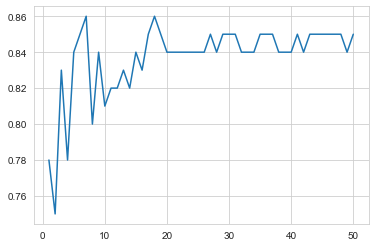

In [33]:
sns.set_style('whitegrid')
sns.lineplot(range(1, 51), find_optimal(50))

In [34]:
max_val = max(find_optimal(50))
max_index = find_optimal(50).index(max_val) + 1
print(f'max score - {max_val}, optimal n_neighbors={max_index}')

max score - 0.86, optimal n_neighbors=7
